In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 17, 'figure.figsize': [15, 7]})
FIGSIZE = (15, 7)

## Net electricity consumption w/o storage analysis

The data we analyze here is the net consumption given by the bare electrical consumption minus the generation difference.

We take the values already calcolated by the envivorment using:

`pd.DataFrame(np.array([env.buildings[i].net_electricity_consumption_without_storage for i in range(5)]).T, columns = [f'Building_{i}' for i in range(1,6)]).to_csv('data/net_electricity_consumption_without_storage.csv', index=False)`

strangly this is a bit too short, but we will check this issue later:

In [4]:
net_consumption = pd.read_csv(filepath_or_buffer="data/buildings_net_electricity_consumption_without_storage.csv")
print('\n dataset length is ' + str(len(net_consumption)) + ', rather than ' + str(24*365) + '.\n\n')
net_consumption.head()


 dataset length is 8760, rather than 8760.




,Unnamed: 0,Building_0,Building_1,Building_2,Building_3,Building_4
0,0,2.275800,2.188750,1.009623e-07,2.819150,0.771433
1,1,0.851167,1.370667,1.018524e-07,1.928167,0.515883
2,2,0.834600,1.101250,1.008352e-07,0.475817,0.503050
3,3,0.838167,0.543217,1.007080e-07,0.458233,0.535950
4,4,1.478433,0.542833,1.015981e-07,0.446017,0.512617


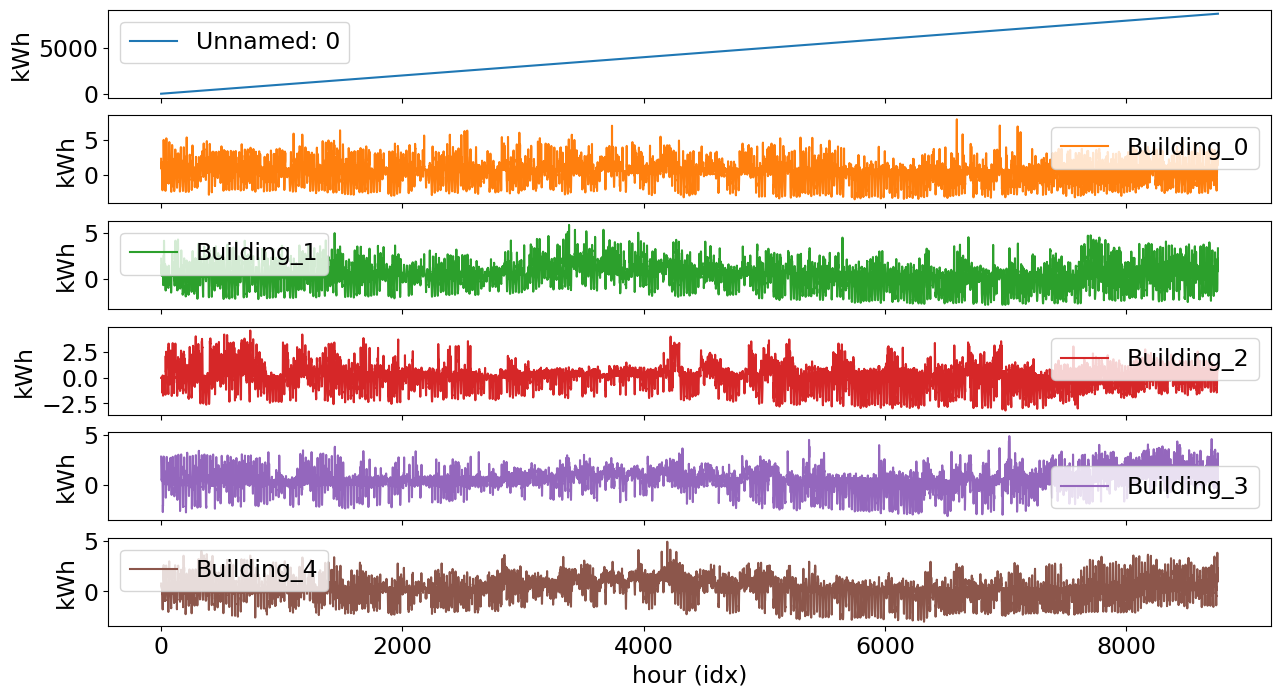

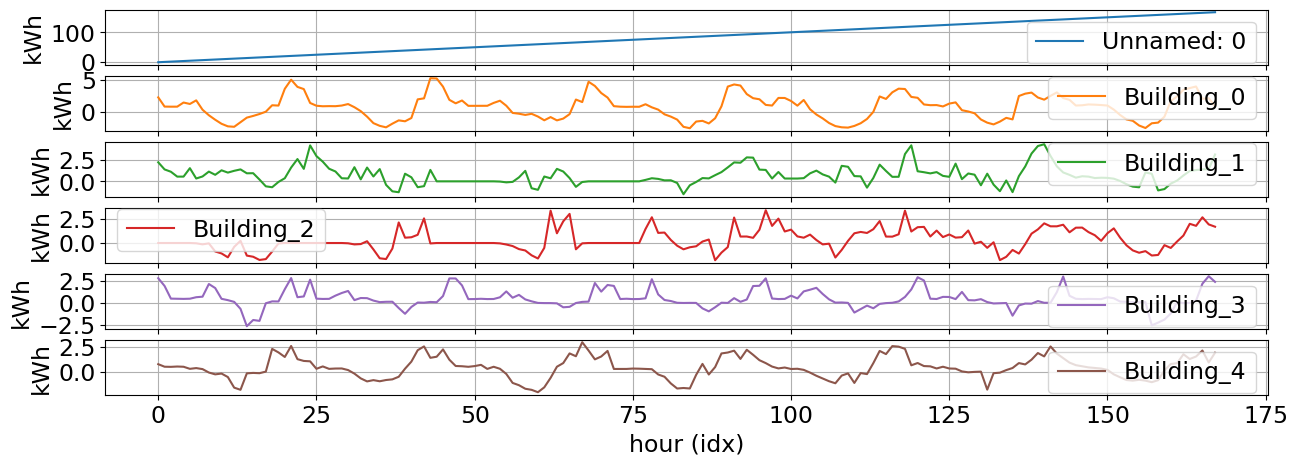

In [5]:
net_consumption.plot(subplots=True, xlabel="hour (idx)", ylabel="kWh", figsize=(15, 8))
net_consumption[:7*24].plot(subplots=True, xlabel="hour (idx)", ylabel="kWh", figsize=(15, 5), grid=True)
plt.show()

The last figure shows that (at least for the first week), each house has distinctive 24h almost-periodic behavior, but all are pretty similar. 

Let's further examine this:

In [4]:
range(len(net_consumption))

range(0, 8498)

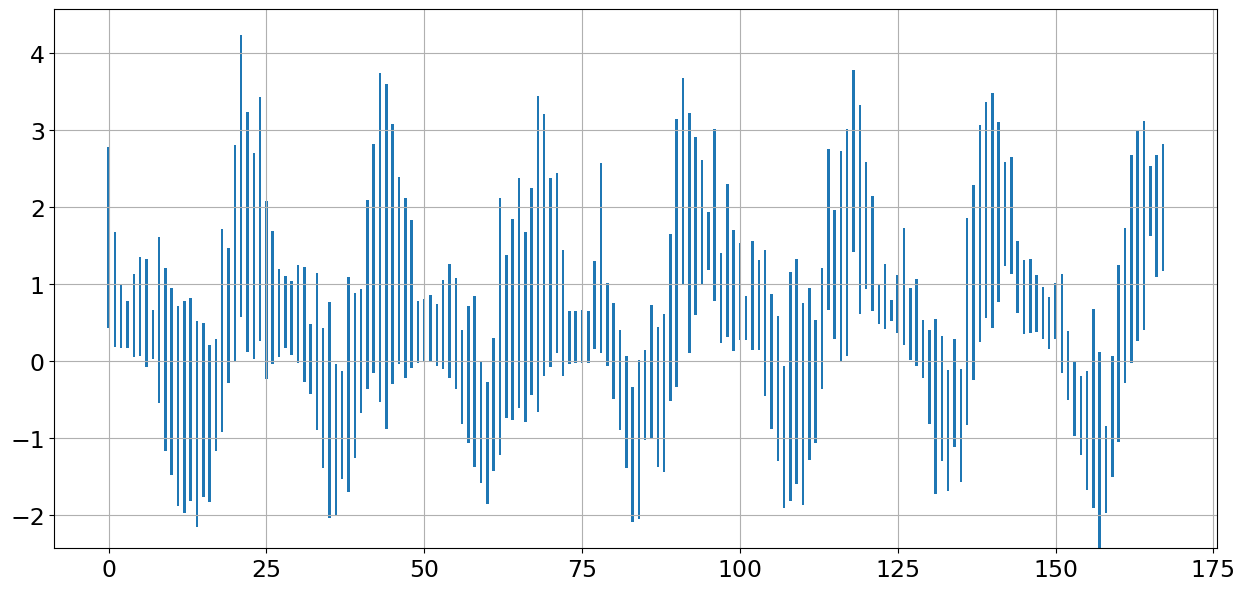

In [5]:
net_consumption_mean = net_consumption.mean(axis=1)
net_consumption_std = net_consumption.std(axis=1)
plt.bar(np.arange(len(net_consumption_mean[:24*7])), 2*net_consumption_std[:24*7], .4, bottom=net_consumption_mean[:24*7]-net_consumption_std[:24*7])
plt.grid()
plt.show()

## histograms

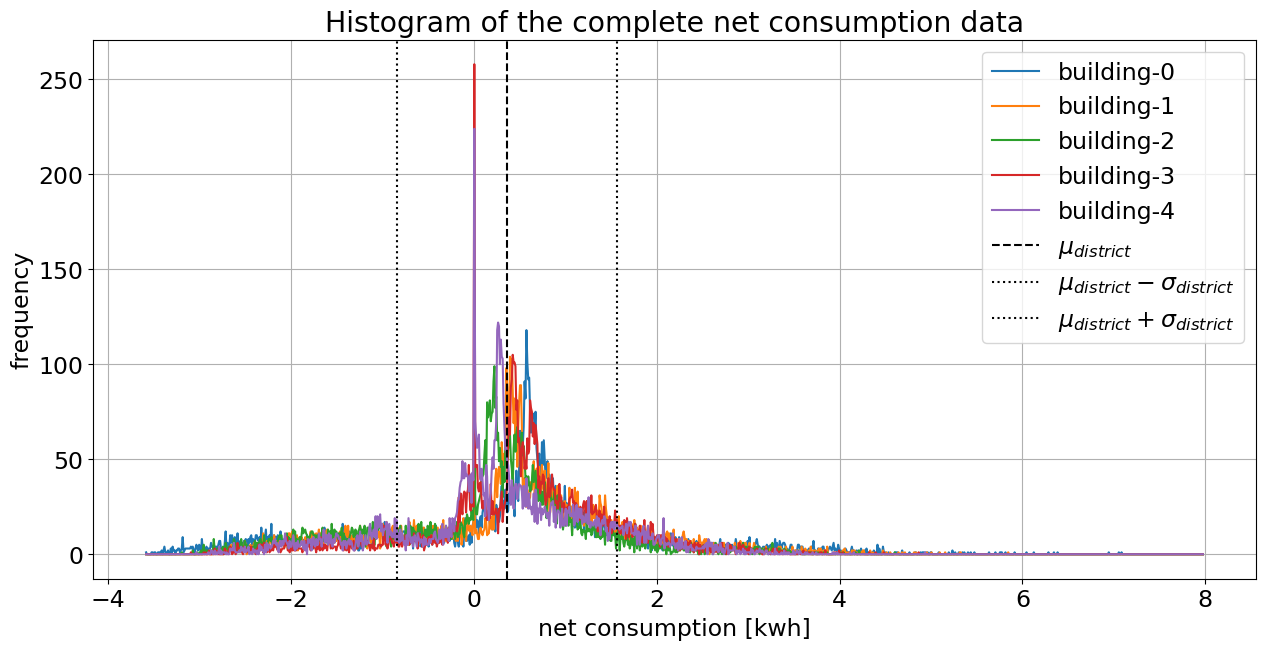

In [6]:
bins = np.arange(np.floor(net_consumption.to_numpy().flatten().min()*100)/100, 
                 np.ceil(net_consumption.to_numpy().flatten().max()*100)/100, 1e-2)
for b in range(5):
    counts, _ = np.histogram(net_consumption.to_numpy()[:,b], bins=bins)
    plt.plot((bins[1:]+bins[:-1])/2, counts, label=f"building-{str(b)}")
plt.title("Histogram of the complete net consumption data")
plt.grid()
plt.axvline(net_consumption.to_numpy().flatten().mean(), linestyle='--', c='black', label="$\mu_{district}$")
plt.axvline(net_consumption.to_numpy().flatten().mean() - net_consumption.to_numpy().flatten().std(), linestyle=':', c='black', label="$\mu_{district} - \sigma_{district}$")
plt.axvline(net_consumption.to_numpy().flatten().mean() + net_consumption.to_numpy().flatten().std(), linestyle=':', c='black', label="$\mu_{district} + \sigma_{district}$")
plt.xlabel('net consumption [kwh]')
plt.ylabel('frequency')
plt.legend()
plt.show()

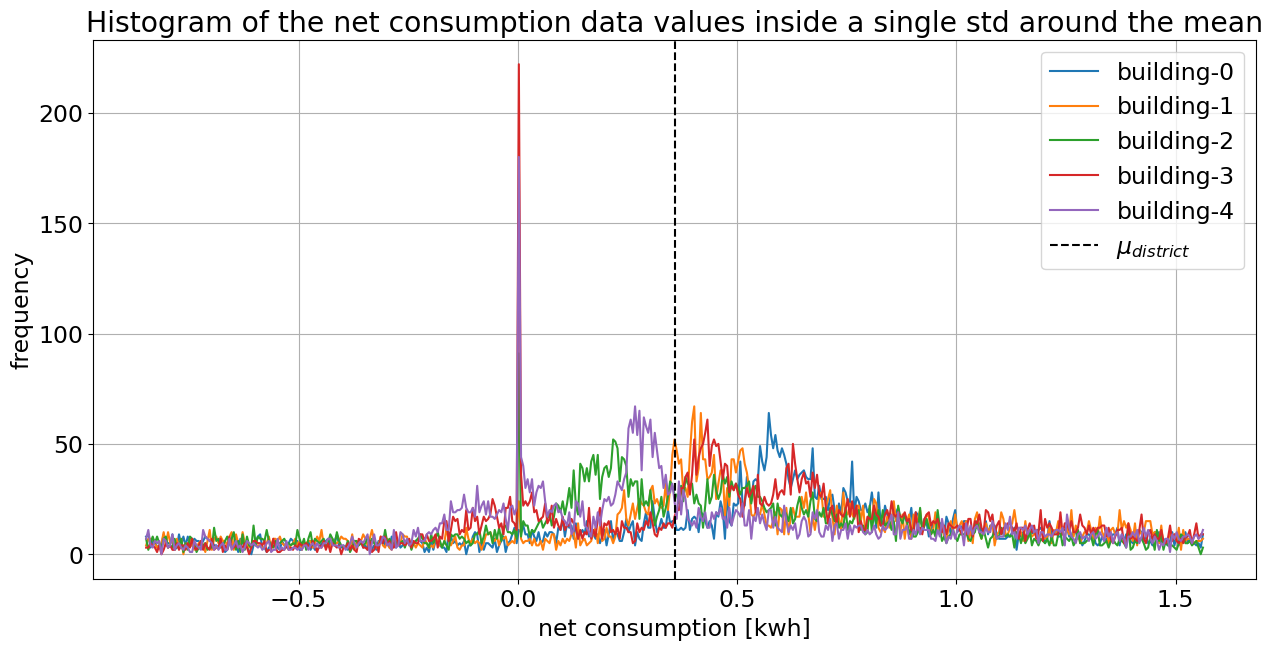

In [7]:
bins = np.arange(np.floor((net_consumption.to_numpy().flatten().mean()-net_consumption.to_numpy().flatten().std())*100)/100,
                 np.ceil((net_consumption.to_numpy().flatten().mean()+net_consumption.to_numpy().flatten().std())*100)/100, 5e-3)
for b in range(5):
    counts, _ = np.histogram(net_consumption.to_numpy()[:,b], bins=bins)
    plt.plot((bins[1:]+bins[:-1])/2, counts, label=f"building-{str(b)}")
plt.title("Histogram of the net consumption data values inside a single std around the mean")
plt.grid()
plt.axvline(net_consumption.to_numpy().flatten().mean(), linestyle='--', c='black', label="$\mu_{district}$")
plt.xlabel('net consumption [kwh]')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [8]:
net_consumption_diff = net_consumption.diff().abs()
net_consumption_diff = net_consumption_diff.drop([0])
net_consumption_diff.head()

,Building_1,Building_2,Building_3,Building_4,Building_5
1,1.424633,0.818083,8.900960e-10,0.890983,0.255550
2,0.016567,0.269417,1.017253e-09,1.452350,0.012833
3,0.003567,0.558033,1.271566e-10,0.017583,0.032900
4,0.640267,0.000383,8.900960e-10,0.012217,0.023333
5,0.222233,0.969600,2.161662e-09,0.019867,0.209400


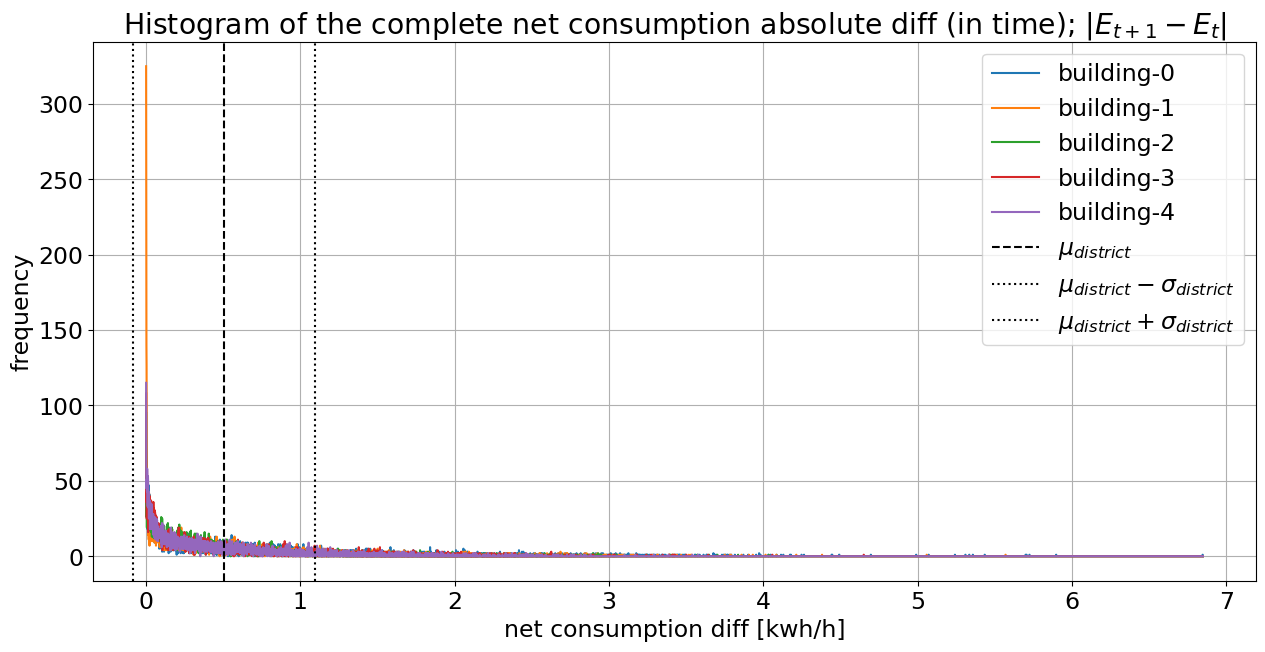

In [9]:
bins = np.arange(0, np.ceil(net_consumption_diff.to_numpy().flatten().max()*100)/100, 1e-3)
for b in range(5):
    counts, _ = np.histogram(net_consumption_diff.to_numpy()[:,b], bins=bins)
    plt.plot((bins[1:]+bins[:-1])/2, counts, label=f"building-{str(b)}")
plt.title("Histogram of the complete net consumption absolute diff (in time); $|E_{t+1}-E_{t}|$")
plt.grid()
plt.axvline(net_consumption_diff.to_numpy().flatten().mean(), linestyle='--', c='black', label="$\mu_{district}$")
plt.axvline(net_consumption_diff.to_numpy().flatten().mean() - net_consumption_diff.to_numpy().flatten().std(), linestyle=':', c='black', label="$\mu_{district} - \sigma_{district}$")
plt.axvline(net_consumption_diff.to_numpy().flatten().mean() + net_consumption_diff.to_numpy().flatten().std(), linestyle=':', c='black', label="$\mu_{district} + \sigma_{district}$")
plt.xlabel('net consumption diff [kwh/h]')
plt.ylabel('frequency')
plt.legend()
plt.show()

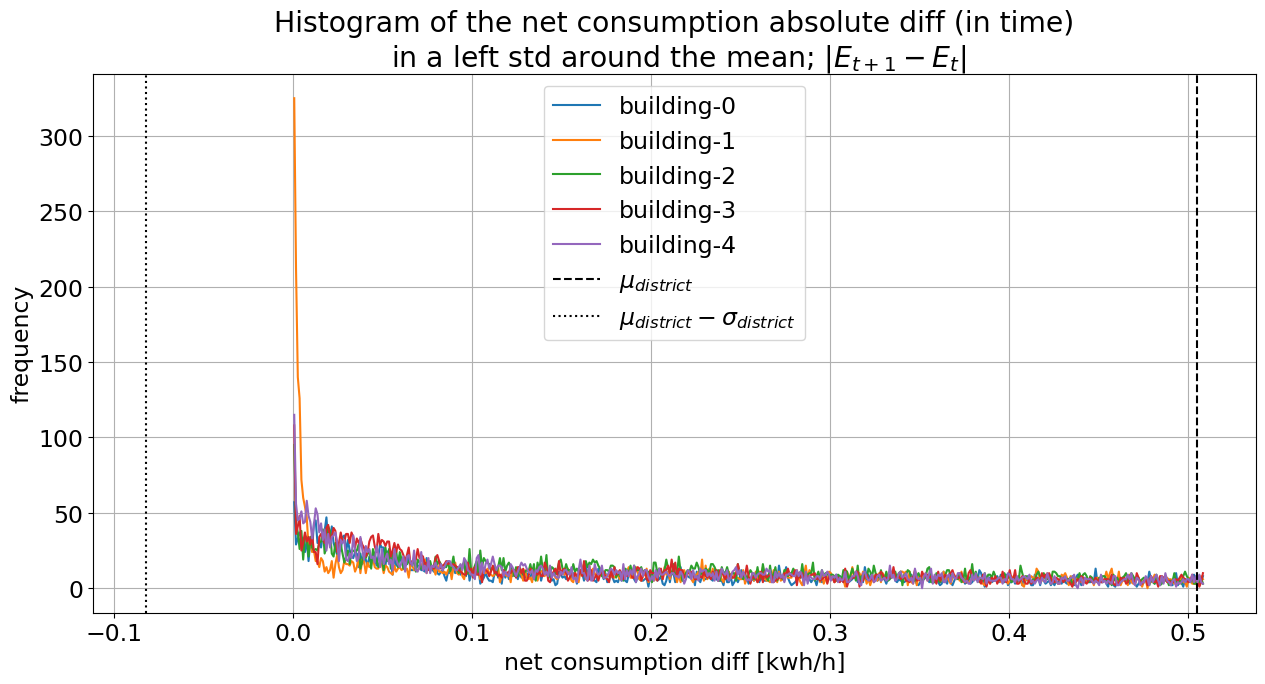

In [10]:
bins = np.arange(0, np.ceil(net_consumption_diff.to_numpy().flatten().mean()*100)/100, 1e-3)
for b in range(5):
    counts, _ = np.histogram(net_consumption_diff.to_numpy()[:,b], bins=bins)
    plt.plot((bins[1:]+bins[:-1])/2, counts, label=f"building-{str(b)}")
plt.title("Histogram of the net consumption absolute diff (in time)\n in a left std around the mean; $|E_{t+1}-E_{t}|$")
plt.grid()
plt.axvline(net_consumption_diff.to_numpy().flatten().mean(), linestyle='--', c='black', label="$\mu_{district}$")
plt.axvline(net_consumption_diff.to_numpy().flatten().mean() - net_consumption_diff.to_numpy().flatten().std(), linestyle=':', c='black', label="$\mu_{district} - \sigma_{district}$")
# plt.axvline(net_consumption_diff.to_numpy().flatten().mean() + net_consumption_diff.to_numpy().flatten().std(), linestyle=':', c='black')
plt.xlabel('net consumption diff [kwh/h]')
plt.legend()
plt.ylabel('frequency')
plt.show()

## log scale:

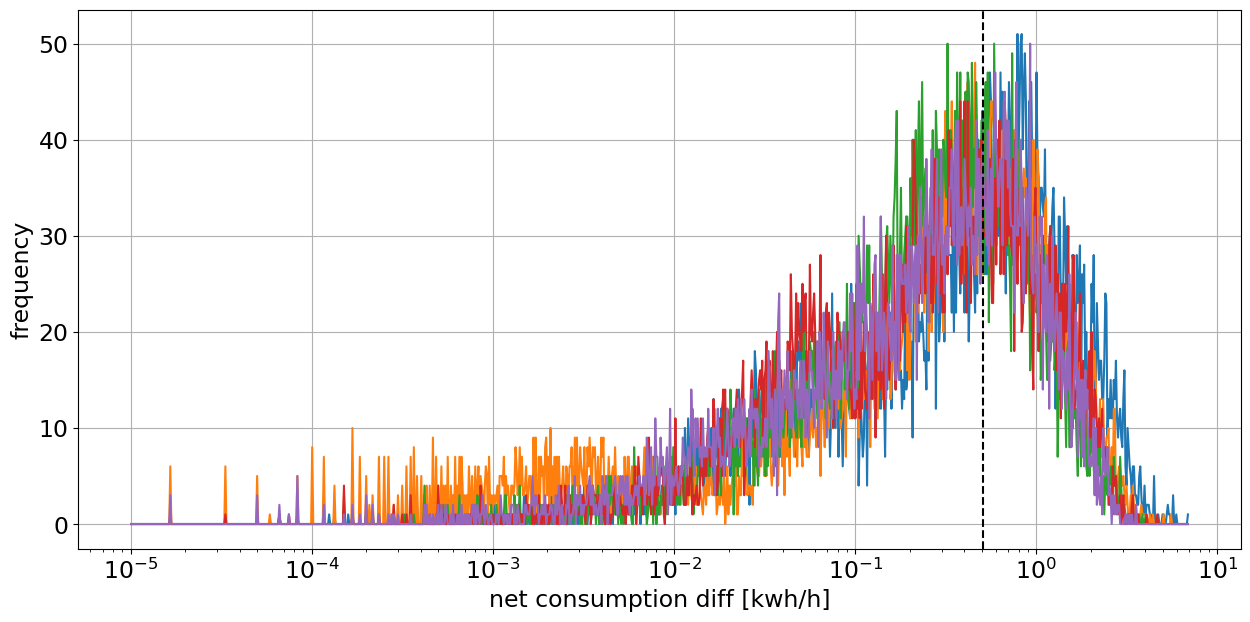

In [11]:
bins = np.logspace(-5, np.ceil(np.log10(net_consumption_diff.to_numpy().flatten().max())*100)/100, 1000)
for b in range(5):
    counts, _ = np.histogram(net_consumption_diff.to_numpy()[:,b], bins=bins)
    plt.semilogx((bins[1:]+bins[:-1])/2, counts)
plt.grid()
plt.axvline(net_consumption_diff.to_numpy().flatten().mean(), linestyle='--', c='black')
plt.axvline(net_consumption_diff.to_numpy().flatten().mean() - net_consumption_diff.to_numpy().flatten().std(), linestyle=':', c='black')
# plt.axvline(net_consumption_diff.to_numpy().flatten().mean() + net_consumption_diff.to_numpy().flatten().std(), linestyle=':', c='black')
plt.xlabel('net consumption diff [kwh/h]')
plt.ylabel('frequency')
plt.show()

## Conclusion
From the log scale plot above of the net electricity consumption diff (in time), one can see that the mean diff equals $0.5$. The objective of plotting the data this way is to realize what would be a well-approximated action space discretization. We see a significant amount of the data is larger than $10^{-2}$. Thus, we can expect that $\delta a=10^{-2}$ would be a small enough action space discretization such that we could follow the net consumption trends using the agents' batteries.

To see this more directly, we sort the flattened data and count the precntile up to each stepsize:

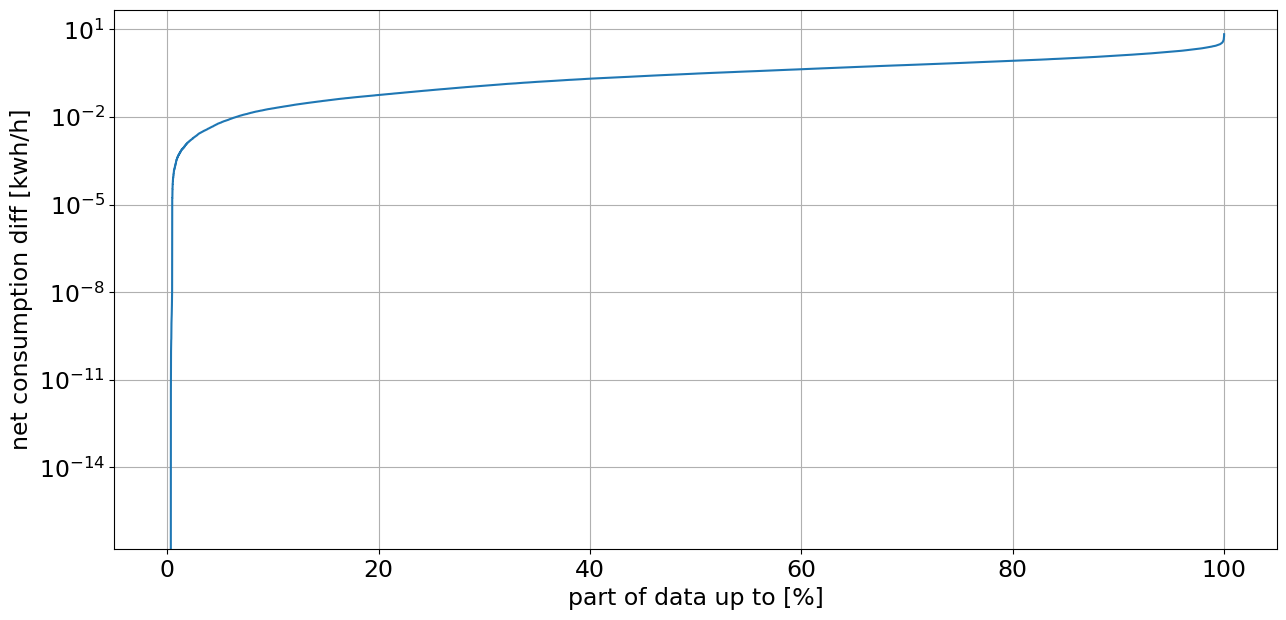

In [13]:
diff_sorted = np.sort(net_consumption_diff.to_numpy().flatten())
prec_scale = np.arange(1, len(diff_sorted)+1)/len(diff_sorted)*100
plt.semilogy(prec_scale, diff_sorted)
plt.grid()
plt.xlabel('part of data up to [%]')
plt.ylabel('net consumption diff [kwh/h]')
plt.show()

### zoom:

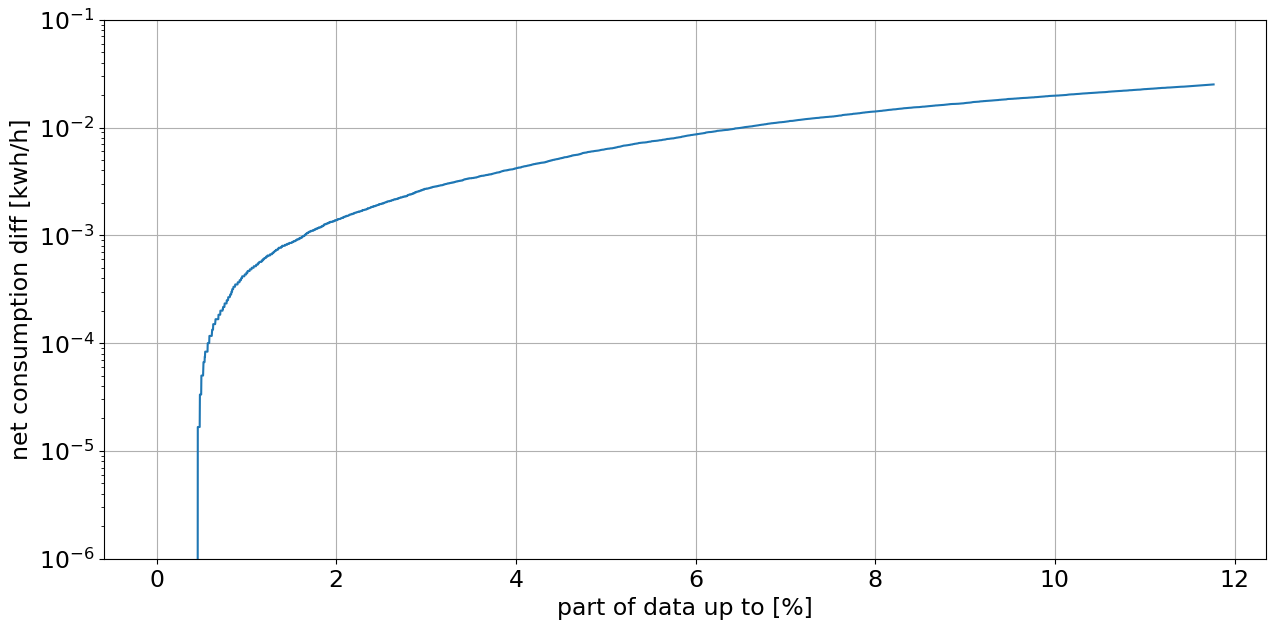

In [17]:
sorted_part = sorted[1:5000]
prec_scale = np.arange(1, len(sorted_part)+1)/len(sorted)*100
plt.semilogy(prec_scale, sorted_part)
plt.grid()
plt.xlabel('part of data up to [%]')
plt.ylabel('net consumption diff [kwh/h]')
plt.ylim((1e-6, .1))
plt.show()

This confirms our previous conclution that $\delta a=10^{-2}$ is good (for about $94\%$ of the steps).

The relevant range to scan this parameter would be $[10^{-3},10^{-2}]$ or maybe a bit wider.

We also note here that this should be the value of the energy changed per step, so a scaling factor from the actual a is to be introduced per the SoC.